# Homework 1
Jonathan Elsner \
October 4th, 2024

In [104]:
import pandas as pd

import numpy as np
from numpy.polynomial import Polynomial

import matplotlib.pyplot as plt

## Problem 1

In [39]:
data = pd.read_csv('lab1-water-spout-measurements.csv', index_col='time (s)')
data.dropna(inplace=True)
data

,height (cm)
time (s),
0,44.5
20,43.0
40,42.0
60,40.8
80,39.6
...,...
1340,10.4
1360,10.4
1380,10.4


### Part 5

In [184]:
poly = Polynomial.fit(data.index, data['height (cm)'], deg=2).convert()

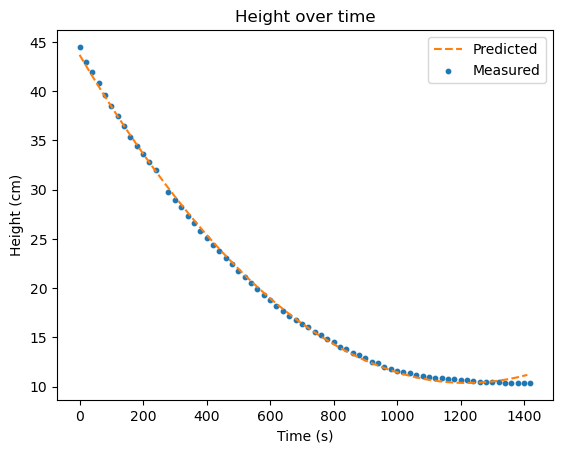

In [183]:
ax = plt.gca()

x = np.arange(0, 1420, 10)
y = poly(x)
ax.plot(x, y, linestyle='--', color='tab:orange', label='Predicted')

ax.scatter(data.index, data['height (cm)'], s=10, label='Measured')

ax.set_title('Height over time')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Height (cm)')
ax.legend()

plt.show()

The fitted second degree polynomial and R-squared are below:

In [185]:
poly

Polynomial([ 4.36924060e+01, -5.46673934e-02,  2.24202701e-05], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

In [182]:
from sklearn.metrics import r2_score

r2 = r2_score(data['height (cm)'], poly(data.index))
print(f'R² = {r2}')

R² = 0.9991633480643921


#### Predicted hole radius

In [214]:
a = poly.coef[2] # coefficient of t^2

g = 9.81 * 100 # gravity converted to cgs
r_p = 5.5 / 2 # pipe radius
r_h = r_p * np.power(2*a/g, 0.25)
print(f'{r_h:0.3f} cm')

0.040 cm


This is the predicted radius in centimeters. We estimated that the hole has a diameter of approximately 1mm, so this is logical.

### Part 6

$ P_\text{hydro} = P_\text{atm} + P_\rho $

In [223]:
sigma = 0.07 # Surface tension of water at room temperature
alpha = 0 # angle of incidence for surface tension
P_surface_tension = 2 * sigma * np.cos(alpha) / r_h
print(f'{P_surface_tension:0.3f} N/m^2')

3.482 N/m^2


## Problem 2

### Part 3

In [216]:
g = 9.81 # gravity
R = 287 # R_specific for air
T_0 = 295 # Room temp in kelvin
P_0 = P_atm = 101325 # atmospheric pressure in Pa

def pressure(z):
    return P_0 * np.exp(-z / (R * T_0 / g))

P = pressure(1.8)
print(f'{P:0.3f} Pa')

101303.870 Pa


As a ratio of atmospheric pressure:

In [198]:
P / P_atm

0.999791458587092

So the final pressure in the tube is 99% of atmospheric pressure.

In [219]:
final_density = P / (R * T_0)
print(f'{final_density:0.5f} kg/m^3')

1.19653 kg/m^3


This is the final density of the gas inside the tube. We expect this to be slightly lower than the density of air normally, which is:

In [220]:
air_density = P_atm / (R * T_0)
f'{air_density:0.5f} kg/m^3' 

'1.19678 kg/m^3'

As a ratio:

In [208]:
final_density / air_density

0.999791458587092

Slightly smaller, as we expected.

### Part 4